<a href="https://colab.research.google.com/github/DanaJian/Machine-learning-technologies/blob/main/Optimization_Methods_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
from google.colab import drive
import numpy as np
import pandas as pd
from typing import Tuple, List

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.optim import SGD, RMSprop, Adam

1. ЗАГРУЗКА ДАТАСЕТА И ПРЕДОБРАБОТКА ДАННЫХ

In [284]:
drive.mount('/content/drive')
path = ('/content/drive/My Drive/bioresponse.csv')
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [286]:
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.tensor(X_train).to(torch.float32)
X_test = torch.tensor(X_test).to(torch.float32)
y_train = torch.tensor(y_train).to(torch.float32)
y_test = torch.tensor(y_test).to(torch.float32)

2. РЕАЛИЗАЦИЯ ФУНКЦИЙ

In [287]:
# Инициализация генеральных переменных
learning_rate = 0.02
momentum = 0.8
epochs = 2000

In [288]:
# Функция модели линейной регресии
class LinearRegressionNet(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 32),
            nn.Linear(32, 16),
            nn.Linear(16, 1)
        )
    
    def forward(self, x) -> torch.Tensor:
        return self.model(x)

In [289]:
# Функция обучения модели
def train(model: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          loss_fn: torch.nn.modules.loss._Loss, 
          X: torch.Tensor, 
          y: torch.Tensor, 
          silent: bool = False) -> Tuple[torch.nn.Module, List[float]]:
  loss_data = []

  for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X)
    loss = loss_fn(torch.squeeze(pred), y)
    loss_data.append(loss.detach().numpy())
    if epoch and epoch % (epochs/10) == 0 and not silent:
      print(f'Эпоха: {epoch}, Ошибка: {loss}')
    loss.backward()
    optimizer.step()

  return model, loss_data

3. ОБУЧЕНИЕ МОДЕЛЕЙ

In [290]:
model = LinearRegressionNet(X_train.shape[1])
optimizer = SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

sgd_model, sgd_loss_data = train(model, optimizer, loss_fn, X_train, y_train)

Эпоха: 200, Ошибка: 0.16320544481277466
Эпоха: 400, Ошибка: 0.1446293294429779
Эпоха: 600, Ошибка: 0.13677255809307098
Эпоха: 800, Ошибка: 0.1315533071756363
Эпоха: 1000, Ошибка: 0.13444994390010834
Эпоха: 1200, Ошибка: 0.12704437971115112
Эпоха: 1400, Ошибка: 0.12462178617715836
Эпоха: 1600, Ошибка: 0.12332863360643387
Эпоха: 1800, Ошибка: 0.12313364446163177


In [291]:
model = LinearRegressionNet(X_train.shape[1])
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=momentum)
loss_fn = nn.MSELoss()

momentum_model, momentum_loss_data = train(model, optimizer, loss_fn, X_train, y_train)

Эпоха: 200, Ошибка: 0.13232135772705078
Эпоха: 400, Ошибка: 0.11808765679597855
Эпоха: 600, Ошибка: 0.11973685771226883
Эпоха: 800, Ошибка: 0.11123205721378326
Эпоха: 1000, Ошибка: 0.12636657059192657
Эпоха: 1200, Ошибка: 0.10656657069921494
Эпоха: 1400, Ошибка: 0.1149914339184761
Эпоха: 1600, Ошибка: 0.10313321650028229
Эпоха: 1800, Ошибка: 0.10432592779397964


In [292]:
model = LinearRegressionNet(X_train.shape[1])
optimizer = RMSprop(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

rmsprop_model, rmsprop_loss_data = train(model, optimizer, loss_fn, X_train, y_train)

Эпоха: 200, Ошибка: 0.34048426151275635
Эпоха: 400, Ошибка: 6.03889799118042
Эпоха: 600, Ошибка: 0.15435931086540222
Эпоха: 800, Ошибка: 0.15032972395420074
Эпоха: 1000, Ошибка: 0.14877624809741974
Эпоха: 1200, Ошибка: 0.13416962325572968
Эпоха: 1400, Ошибка: 0.12727530300617218
Эпоха: 1600, Ошибка: 0.5539245009422302
Эпоха: 1800, Ошибка: 0.278531938791275


In [293]:
model = LinearRegressionNet(X_train.shape[1])
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

adam_model, adam_loss_data = train(model, optimizer, loss_fn, X_train, y_train)

Эпоха: 200, Ошибка: 0.13104531168937683
Эпоха: 400, Ошибка: 0.10084287822246552
Эпоха: 600, Ошибка: 0.08795005083084106
Эпоха: 800, Ошибка: 0.08774645626544952
Эпоха: 1000, Ошибка: 0.0827188789844513
Эпоха: 1200, Ошибка: 0.08398471772670746
Эпоха: 1400, Ошибка: 0.08025389909744263
Эпоха: 1600, Ошибка: 0.08385276049375534
Эпоха: 1800, Ошибка: 0.07884278893470764


4. ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ МОДЕЛЕЙ

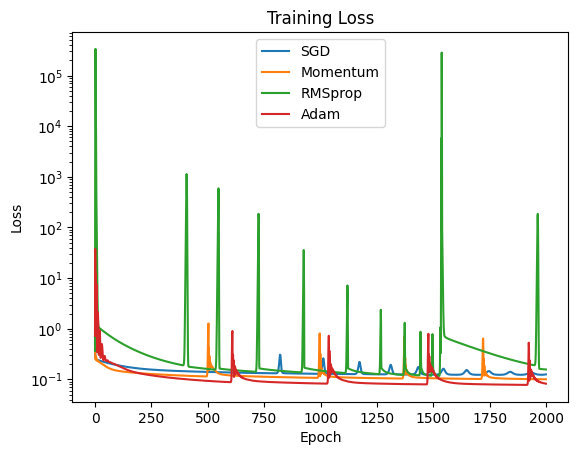

In [294]:
import matplotlib.pyplot as plt

plt.plot(sgd_loss_data, label='SGD')
plt.plot(momentum_loss_data, label='Momentum')
plt.plot(rmsprop_loss_data, label='RMSprop')
plt.plot(adam_loss_data, label='Adam')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.yscale('log')
plt.show()

5. СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОЧНОСТИ РЕШЕНИЯ ОПТИМИЗАЦИОННОЙ ЗАДАЧИ

In [295]:
metrics = []
y_test = y_test.detach().numpy()

for model in [sgd_model,
              momentum_model,
              rmsprop_model,
              adam_model]:

  predict = np.round(model(X_test).detach().numpy())
  accuracy  = accuracy_score(y_test, predict)
  metrics.append(accuracy)

In [296]:
data = {
    'SGD': metrics[0],
    'Momentum': metrics[1],
    'RMSProp': metrics[2],
    'Adam': metrics[3]
}

data_df = pd.DataFrame(data, index=['Accuracy'])
data_df

,SGD,Momentum,RMSProp,Adam
Accuracy,0.761651,0.75233,0.757656,0.737683
